<a href="https://colab.research.google.com/github/LAICEROO/AI_LAB/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:
feature_set, labels = datasets.make_moons(100,noise=(0.1))

In [ ]:
class Sigmoid_layer:
  def __init__(self, number_of_input_nodes, number_of_neurons):
    self.weights = np.random.randn(number_of_input_nodes, number_of_neurons )
    self.biases = np.random.randn(1,number_of_neurons)

  def forward_prop(self, input_data):
    self.orig_input = input_data
    self.input_data = input_data #to be used in backprop

    self.XW_B = np.dot(self.input_data, self.weights) + self.biases
    self.output_val = sigmoid(self.XW_B)
    return self.output_val

  def back_prop(self, gradient, learning_rate):
    #gradients with respect to out (z)
    dlayer_dz = gradient.copy()
    layer_activation_der = sigmoid_der(self.XW_B)

    #gradients of totals against weights/biases/input
    dXW_B_dw = self.input_data
    dXW_B_db = 1

    dXWB__dinputs = self.weights

    dLayer_dweights = self.input_data.T @ (gradient * layer_activation_der)
    dLayer_dbiases =  np.sum((gradient * layer_activation_der),axis=0)

    self.weights -= learning_rate * dLayer_dweights
    self.biases -= learning_rate * dLayer_dbiases

    dLayer_dinputs = (gradient * layer_activation_der) @ self.weights.T

    return dLayer_dinputs

In [ ]:
#tworzymy obiekty reprezentujace warstwy
#aby zresetowac wagi sieci nalezy uruchomic ta komorke jeszcze raz
layer1 = Sigmoid_layer(2, 5)
layer12 = Sigmoid_layer(5, 5)
layer2 = Sigmoid_layer(5, 3)
layer3 = Sigmoid_layer(3, 1)


#wektor labels zmieniamy na pinonowy
labels = labels.reshape(100,1)


#tworzymy pusta liste przechowujaca wartosci funkcji kosztu wzgledem iteracji
#tak aby mozna bylo utworzyc wykres
J_values=[]


In [ ]:
layer1.forward_prop(np.array([0.1, 0.2]))

array([[0.20541824, 0.85383248, 0.35227723, 0.47924865, 0.59999114]])

In [ ]:
def Cross_Entropy(y_hat,y):
  return 1/y_hat.shape[0]*np.sum( -1*((y>0) * np.log(y_hat))-1*(y==0)* np.log(1-y_hat))


def derivative_Cross_Entropy(y_hat,y):
  return -1*((y>0) / y_hat)+((y==0) / (1-y_hat))

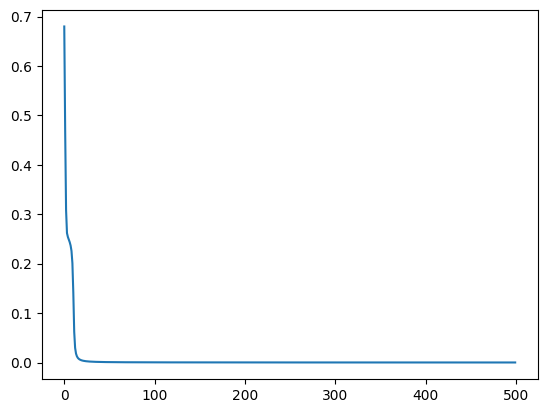

In [ ]:
learning_rate = 0.005
Jtrain_values=[]
inputs = feature_set


#petla uczaca
for iteration in range(50000):
  #FORWARD
  output = layer1.forward_prop(inputs)
  output = layer12.forward_prop(output)
  output = layer2.forward_prop(output)
  output = layer3.forward_prop(output)

#co 100 iteracji oblczmay funkcje kosztu
  if (iteration % 100) ==0:
    J = Cross_Entropy(output, labels)
    #J = MeanSquare_Error(output, labels)
    Jtrain_values.append(J)


  #BACKWARD
  #pierwszy gardient zawiera wartosc dJ_dout
  dJ_dout = derivative_Cross_Entropy(output, labels)
  #dJ_dout = MSE_der(output, labels)


  gradient = layer3.back_prop(dJ_dout, learning_rate)
  gradient = layer2.back_prop(gradient, learning_rate)
  gradient = layer12.back_prop(gradient, learning_rate)
  gradient = layer1.back_prop(gradient, learning_rate)


plt.plot(Jtrain_values)



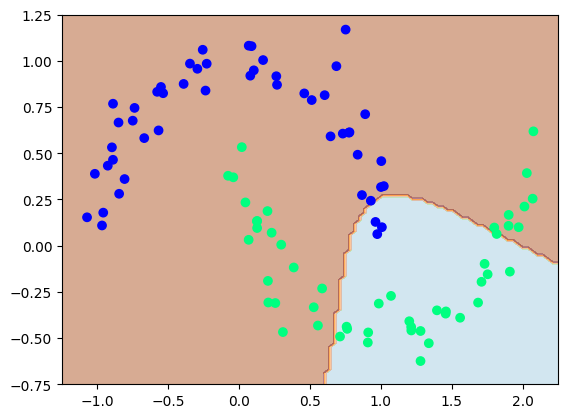

In [ ]:
cmap = plt.get_cmap('Paired')
# Define region of interest by data limits
xmin = -1.25
xmax = 2.25
ymin = -0.75
ymax = 1.25

steps = 100

x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

# Plot decision boundary in region of interest
z = np.zeros(xx.shape,dtype=int)

ii=0
for i in x_span:
  jj=0
  for j in y_span:

    classification_criteria = 0.5


    #FEED FORWARD / 1 WRSTWA
    inputs = np.array( [i,j] )


    #TU UZUPELNIC FRAGMENTEM SIECI PROWADZACYM OBLICZENIA FORWARD
    output = layer1.forward_prop(inputs)
    output = layer2.forward_prop(output)
    output = layer3.forward_prop(output)

    if output > classification_criteria:


    #if i==j :
      z[jj,ii] = 1
    jj=jj+1
  ii=ii+1

fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)
# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

**PIMA INDIANS**

In [ ]:
!wget https://bigbang.prz.edu.pl/si-inz/pima_indians.csv

--2023-12-20 09:40:54--  https://bigbang.prz.edu.pl/si-inz/pima_indians.csv
Resolving bigbang.prz.edu.pl (bigbang.prz.edu.pl)... 89.188.209.177
Connecting to bigbang.prz.edu.pl (bigbang.prz.edu.pl)|89.188.209.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24404 (24K) [text/csv]
Saving to: ‘pima_indians.csv’

pima_indians.csv    100%[===================>]  23.83K   101KB/s    in 0.2s    

2023-12-20 09:40:56 (101 KB/s) - ‘pima_indians.csv’ saved [24404/24404]



Import biblioteki csv i odczyt pliku csv

In [ ]:
#wczytanie pliku
import csv
file = open('pima_indians.csv')
csvreader = csv.reader(file)

Wczytanie nagłówka (opisu kolumn, lub zawartości) pliku cs

In [ ]:
#wczytujemy opisy kolumn
header = []
#w petli for podajemy ile wierszy to jest naglowek
for i in range (0,9):
  header.append(next(csvreader))
print(header)

[['# 1. Number of times pregnant'], ['# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'], ['# 3. Diastolic blood pressure (mm Hg)'], ['# 4. Triceps skin fold thickness (mm)'], ['# 5. 2-Hour serum insulin (mu U/ml)'], ['# 6. Body mass index (weight in kg/(height in m)^2)'], ['# 7. Diabetes pedigree function'], ['# 8. Age (years)'], ['# 9. Class variable (0 or 1)']]


In [ ]:
# wczytanie danych liczbowych do tablicy
rows = []
for row in csvreader:
        rows.append(row)
print(rows)

[['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'], ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'], ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0'], ['0', '137', '40', '35', '168', '43.1', '2.288', '33', '1'], ['5', '116', '74', '0', '0', '25.6', '0.201', '30', '0'], ['3', '78', '50', '32', '88', '31.0', '0.248', '26', '1'], ['10', '115', '0', '0', '0', '35.3', '0.134', '29', '0'], ['2', '197', '70', '45', '543', '30.5', '0.158', '53', '1'], ['8', '125', '96', '0', '0', '0.0', '0.232', '54', '1'], ['4', '110', '92', '0', '0', '37.6', '0.191', '30', '0'], ['10', '168', '74', '0', '0', '38.0', '0.537', '34', '1'], ['10', '139', '80', '0', '0', '27.1', '1.441', '57', '0'], ['1', '189', '60', '23', '846', '30.1', '0.398', '59', '1'], ['5', '166', '72', '19', '175', '25.8', '0.587', '51', '1'], ['7', '100', '0', '0', '0', '30.0', '0.484', '32', '1'], ['0', '118', '84', '47', '230', '45.8', '0.551', '31', '

In [ ]:
file.close()

In [ ]:
#przekonwerterowac wczytana liste na tablice numpy array
pima_array=np.array(rows)
print(pima_array)
print(pima_array.shape)


[['6' '148' '72' ... '0.627' '50' '1']
 ['1' '85' '66' ... '0.351' '31' '0']
 ['8' '183' '64' ... '0.672' '32' '1']
 ...
 ['5' '121' '72' ... '0.245' '30' '0']
 ['1' '126' '60' ... '0.349' '47' '1']
 ['1' '93' '70' ... '0.315' '23' '0']]
(768, 9)


In [ ]:
#zmien typ liczb na float
pima_array = pima_array.astype(float)
#przemieszac wiersze w tablicy
np.random.shuffle(pima_array)


In [ ]:
pima_array

array([[2.000e+00, 1.050e+02, 7.500e+01, ..., 5.600e-01, 5.300e+01,
        0.000e+00],
       [5.000e+00, 9.600e+01, 7.400e+01, ..., 9.970e-01, 4.300e+01,
        0.000e+00],
       [1.000e+00, 1.130e+02, 6.400e+01, ..., 5.430e-01, 2.100e+01,
        1.000e+00],
       ...,
       [7.000e+00, 1.360e+02, 9.000e+01, ..., 2.100e-01, 5.000e+01,
        0.000e+00],
       [9.000e+00, 1.640e+02, 7.800e+01, ..., 1.480e-01, 4.500e+01,
        1.000e+00],
       [5.000e+00, 1.870e+02, 7.600e+01, ..., 1.034e+00, 5.300e+01,
        1.000e+00]])

In [ ]:
print("Watosci srednie kolumn")
print(np.average(pima_array, axis=0))


print("\nodchylania std. kolumn")
print(np.std(pima_array, axis=0))

Watosci srednie kolumn
[  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257813   0.4718763   33.24088542   0.34895833]

odchylania std. kolumn
[  3.36738361  31.95179591  19.34320163  15.94182863 115.16894926
   7.87902573   0.33111282  11.75257265   0.47664076]


In [ ]:
#oblicz wartosc srednia w kolumnach
pina_avg = np.average(pima_array, axis=0)


#oblicz wartosc odch. std w kolumnach
pina_std = np.std(pima_array, axis=0)


#przeskaluj dane w kolumnach
pina_scaled = (pima_array - pina_avg) / pina_std


#sprawdz wynik skalowania dla pierszego pacjenta (Indianki)
print(pina_scaled[0,:])

[-0.54791859 -0.49745345  0.304734   -1.28821221 -0.69289057 -1.10325546
  0.26614403  1.68125866 -0.73212021]


In [ ]:
print("wartosci srednie")
print(np.average(pina_scaled,axis=0))


print("\n odchylania std")
print(np.std(pina_scaled,axis=0))

wartosci srednie
[-8.16042835e-17 -8.67361738e-18 -2.89120579e-19  5.67399137e-17
 -4.02744967e-16 -2.43005847e-15  1.92554306e-15  1.65376971e-16
  1.50342701e-17]

 odchylania std
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#tablice z cechami
feature_set = pina_scaled[:,0:8] #cechy to pierwsze 8 kolumn
feature_set.shape


#Etykiety
pima_labels =pima_array[:,8] #9 kolum na to etykiety


#konwerterujemy tablice klas/etykiet na wektor pionowy
pima_labels = pima_labels.reshape(pima_labels.shape[0],1)


NameError: name 'pina_scaled' is not defined

In [ ]:
#700 pierwszych wierszy tworzy zbior training
#pozostalych 100 przeznaczamy na test
#wiersze byly wczesniej przelosowane / przemieszane
inputs = feature_set[0:700,:]
labels = pima_labels[0:700,:]

print(inputs.shape)
print(labels.shape)

(700, 8)
(700, 1)


In [ ]:
#bierzemy ostatnie 100 pomiarów
feature_set_test = feature_set[700:,:]
labels_test = pima_labels[700:,:]
print(labels_test.shape)

(68, 1)


In [ ]:
#utworzenie warstw ustawia ich wagi oraz biasy na losowe
sigmoid_layer1 = Sigmoid_layer(8, 5)
sigmoid_layer12 = Sigmoid_layer(5, 7)
sigmoid_layer2 = Sigmoid_layer(7, 3)
sigmoid_layer3 = Sigmoid_layer(3, 1)

#lista do przechowywania wartosci funkcji kosztu dla zbioru train
Jtrain_values=[ ]
#lista do przechowywania wartosci funkcji kosztu dla zbioru walidacyjnego
Jvalidation_values=[]


In [ ]:
learning_rate = 0.005

for iteration in range(500000):
  #FORWARD
  output = sigmoid_layer1.forward_prop(inputs)
  output = sigmoid_layer12.forward_prop(output)
  output = sigmoid_layer2.forward_prop(output)
  output = sigmoid_layer3.forward_prop(output)

  if (iteration % 100) ==0:
    J = Cross_Entropy(output, labels)
    #J = MeanSquare_Error(output, labels)
    Jtrain_values.append(J)




  #BACKWARD
  dJ_dout = derivative_Cross_Entropy(output, labels)
  #dJ_dout = MSE_der(output, labels)

  gradient = sigmoid_layer3.back_prop(dJ_dout, learning_rate)
  gradient = sigmoid_layer2.back_prop(gradient, learning_rate)
  gradient = sigmoid_layer12.back_prop(gradient, learning_rate)
  gradient = sigmoid_layer1.back_prop(gradient, learning_rate)


plt.plot(Jtrain_values)



KeyboardInterrupt: ignored

In [ ]:
prediction = (output_predicted>0.5)
print(prediction)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, prediction)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(labels_test, prediction).ravel()

drzewa decyzyjne

In [ ]:
# Load libraries
import pandas as pd
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


# Import train_test_split function
from sklearn.model_selection import train_test_split


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
!wget bigbang.prz.edu.pl/si-inz/pima_indians.csv

--2023-12-20 09:48:43--  http://bigbang.prz.edu.pl/si-inz/pima_indians.csv
Resolving bigbang.prz.edu.pl (bigbang.prz.edu.pl)... 89.188.209.177
Connecting to bigbang.prz.edu.pl (bigbang.prz.edu.pl)|89.188.209.177|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bigbang.prz.edu.pl/si-inz/pima_indians.csv [following]
--2023-12-20 09:48:44--  https://bigbang.prz.edu.pl/si-inz/pima_indians.csv
Connecting to bigbang.prz.edu.pl (bigbang.prz.edu.pl)|89.188.209.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24404 (24K) [text/csv]
Saving to: ‘pima_indians.csv.1’

pima_indians.csv.1  100%[===================>]  23.83K   101KB/s    in 0.2s    

2023-12-20 09:48:45 (101 KB/s) - ‘pima_indians.csv.1’ saved [24404/24404]



In [ ]:
!ls -l

total 52
-rw-r--r-- 1 root root 24404 Nov 23  2022 pima_indians.csv
-rw-r--r-- 1 root root 24404 Nov 23  2022 pima_indians.csv.1
drwxr-xr-x 1 root root  4096 Dec 18 14:23 sample_data


In [ ]:
# okreslamy nazwy kolumn
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
# header - kolumny naglowka - nie zawieraja danych
# names - okresla liste gdzie sa nasze nazwy kolumn
pima = pd.read_csv("pima_indians.csv", header=9, names=col_names)

In [ ]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


from matplotlib import pyplot as plt
pima['pregnant'].plot(kind='hist', bins=20, title='pregnant')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima['glucose'].plot(kind='hist', bins=20, title='glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima['skin'].plot(kind='hist', bins=20, title='skin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima.plot(kind='scatter', x='pregnant', y='glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima.plot(kind='scatter', x='glucose', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima.plot(kind='scatter', x='bp', y='skin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima.plot(kind='scatter', x='skin', y='insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pima['pregnant'].plot(kind='line', figsize=(8, 4), title='pregnant')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pima['glucose'].plot(kind='line', figsize=(8, 4), title='glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pima['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pima['skin'].plot(kind='line', figsize=(8, 4), title='skin')
plt.gca().spines[['top', 'right']].set_visible(False)

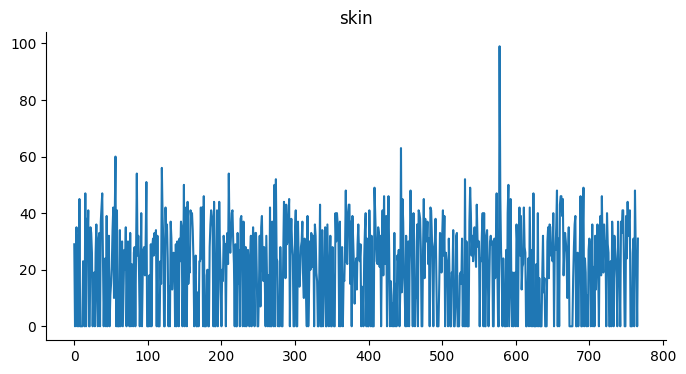

In [ ]:
from matplotlib import pyplot as plt
pima['skin'].plot(kind='line', figsize=(8, 4), title='skin')
plt.gca().spines[['top', 'right']].set_visible(False)

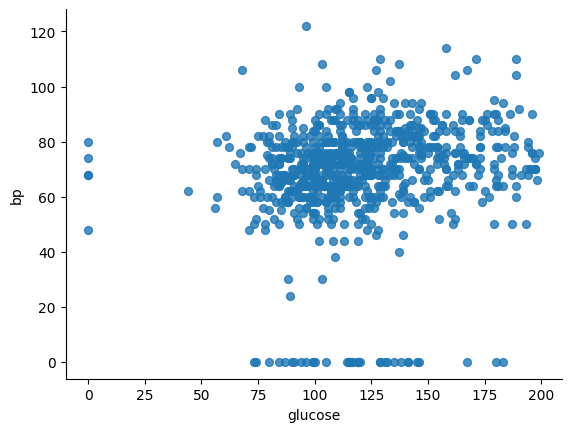

In [ ]:
from matplotlib import pyplot as plt
pima.plot(kind='scatter', x='glucose', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
X

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,1,0,26.6,31,85,66,0.351
1,8,0,23.3,32,183,64,0.672
2,1,94,28.1,21,89,66,0.167
3,0,168,43.1,33,137,40,2.288
4,5,0,25.6,30,116,74,0.201
...,...,...,...,...,...,...,...
762,10,180,32.9,63,101,76,0.171
763,2,0,36.8,27,122,70,0.340
764,5,112,26.2,30,121,72,0.245
765,1,0,30.1,47,126,60,0.349


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: label, Length: 767, dtype: int64

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.087, random_state=11)
# 92.3% training and 8.7% test
# dobrane tak aby w zbiorze treningowym było 700 indianek


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 7)
(700,)
(67, 7)
(67,)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6865671641791045


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[37, 12],
       [ 9,  9]])

In [ ]:
!pip install graphviz

!pip install pydotplus

!pip install six

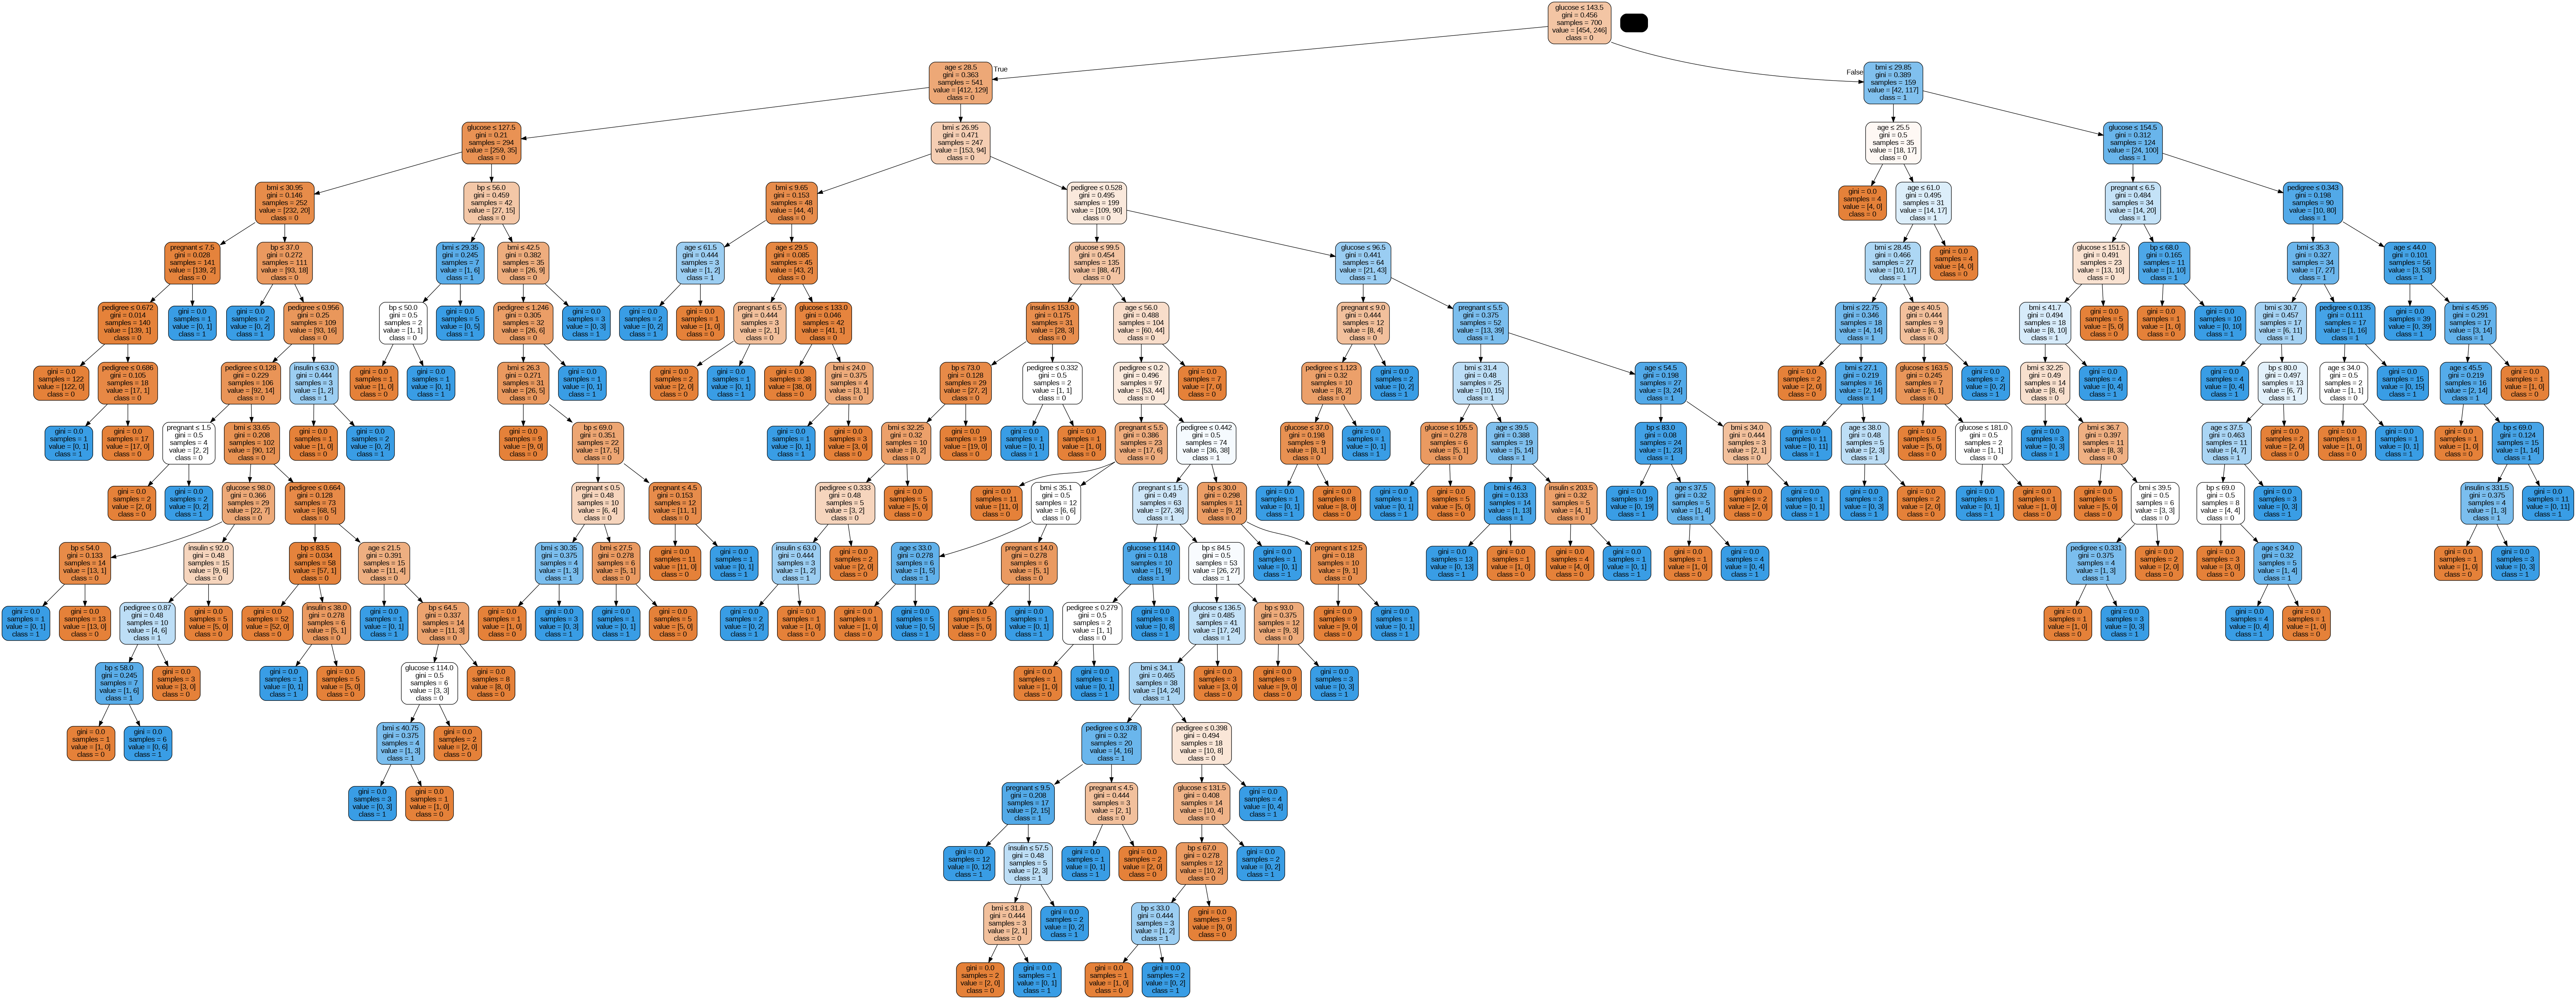

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


Drzewo 4 poziomowe

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7164179104477612


In [ ]:
confusion_matrix(y_test, y_pred)

array([[40,  9],
       [10,  8]])

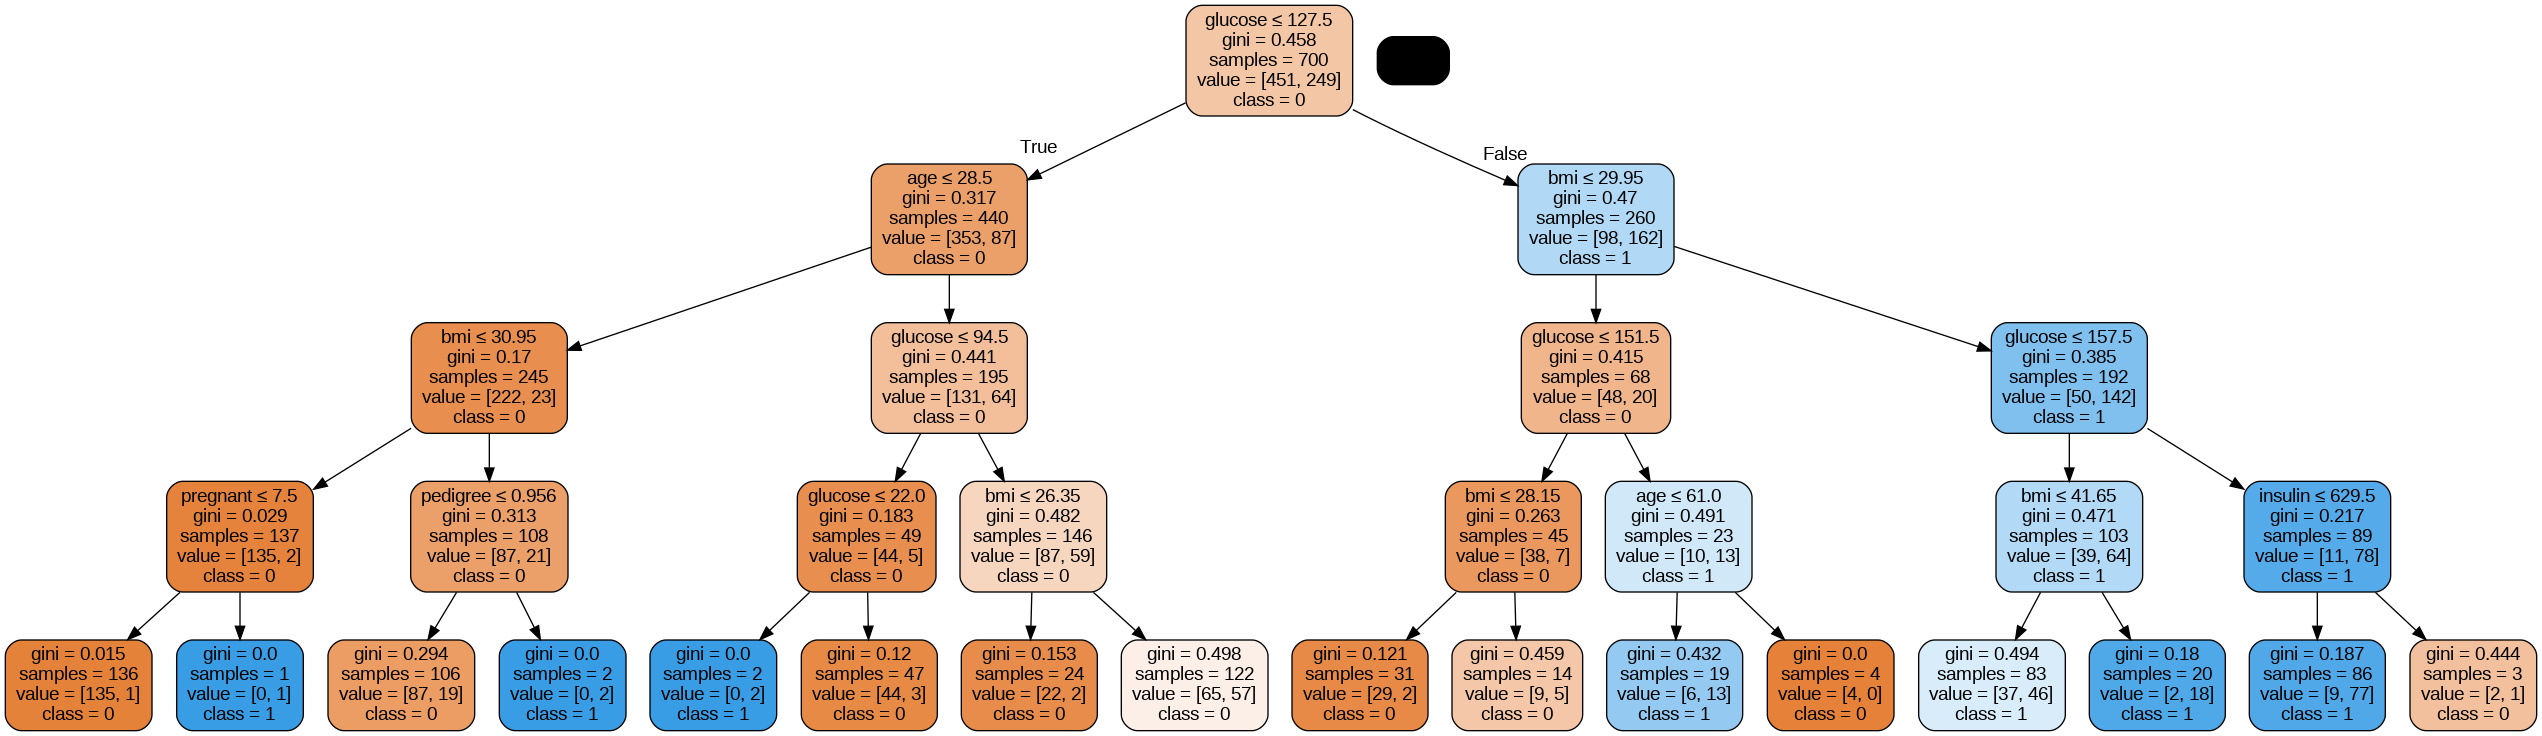

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7761194029850746


In [ ]:
confusion_matrix(y_test, y_pred)

array([[44,  5],
       [10,  8]])

In [ ]:
clf = RandomForestClassifier(n_estimators=10, max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.746268656716418


In [ ]:
confusion_matrix(y_test, y_pred)

array([[43,  6],
       [11,  7]])

uczenie bez nauczyciela

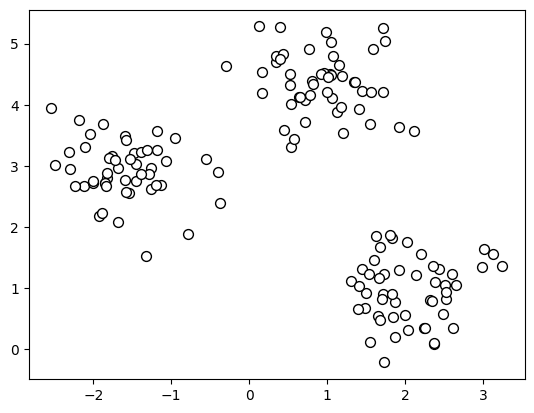

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)


# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)

In [ ]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

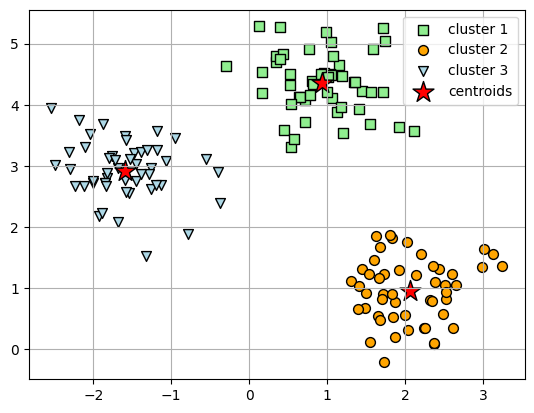

In [ ]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

metoda łokciowa

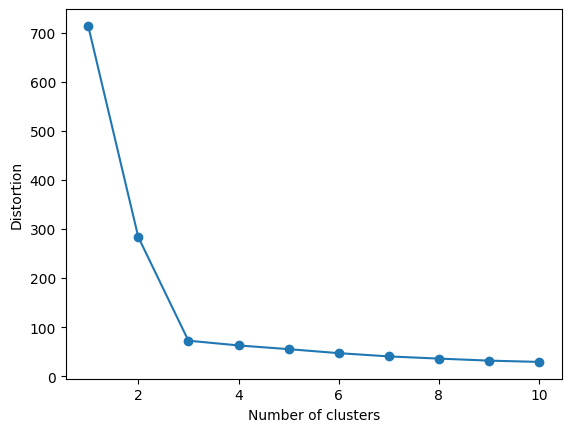

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)


# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()